In [1]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv("bike-sharing.csv")
bike_sharing.set_index(bike_sharing["dteday"], inplace=True)
bike_sharing["cnt"].plot(figsize=(10,6))
plt.plot()

[]

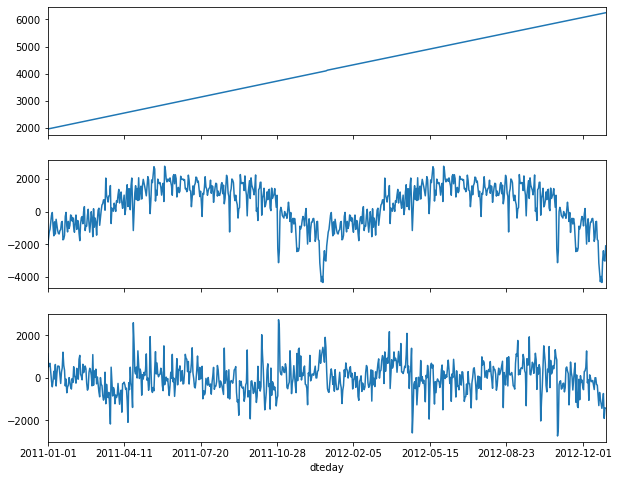

In [2]:
from seasonal import fit_seasons
from numpy import tile

#Find seasonality and trend in data
seasonal_pattern, trend = fit_seasons(bike_sharing["cnt"], period=365)
#Fill the seasonal pattern for the entire data for visualization
bike_sharing["seasonality"] = tile(seasonal_pattern, len(bike_sharing)//len(seasonal_pattern) + 1)[:len(bike_sharing)]
bike_sharing["trend"] = trend
#Calculate residual
bike_sharing["residual"] = bike_sharing["cnt"] - bike_sharing["seasonality"] - bike_sharing["trend"]

fig, axes = plt.subplots(nrows=3,
                         ncols=1,
                         sharex=True,
                        figsize=(10,8))
bike_sharing["trend"].plot(ax=axes[0])
bike_sharing["seasonality"].plot(ax=axes[1])
bike_sharing["residual"].plot(ax=axes[2])

In [3]:
from model.AutoForecastModel import AutoARIMA
import util.Plotter as Plotter

model = AutoARIMA()
predictions = model.fit_predict(bike_sharing["cnt"], seasonal_period=365, test_ratio=0, steps=365)
print(predictions.head(5))

Order : (0, 1, 0) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10359.949570064513


Order : (0, 1, 1) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10110.799060444191
Order : (1, 1, 0) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10262.051762278792


Order : (2, 1, 2) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10064.49532016083


Order : (1, 1, 1) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10075.5526336357


Order : (2, 1, 1) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10077.43321590143


Order : (3, 1, 2) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10061.157422103632


Order : (3, 1, 3) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10042.468217765709


Order : (3, 1, 2) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10061.157422103632


Order : (4, 1, 2) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10043.887776159465


Order : (2, 1, 3) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10031.206041442372


Order : (3, 1, 3) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10042.468217765709


Order : (2, 1, 4) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10028.920483619808


Order : (1, 1, 3) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10051.618363814427


Order : (3, 1, 4) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10029.484935582872


Order : (1, 1, 4) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10039.293031027439


Order : (2, 1, 3) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10031.206041442372


Order : (2, 1, 5) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10014.860043968649


Order : (1, 1, 5) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10019.293512606202


Order : (2, 1, 4) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10028.920483619808


Order : (2, 1, 5) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10014.860043968649


Order : (3, 1, 5) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10011.812515391284


Order : (3, 1, 5) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10011.812515391284


Order : (4, 1, 5) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10012.16539089883


Order : (4, 1, 4) , Seasonal Order : (0, 0, 0, 0), AIC Score : 10027.000927411735
Best ARIMA(3, 1, 5) None with drift
731

                dates         yhat   yhat_lower   yhat_upper
2013-01-01 2013-01-01  3093.487346  1897.792759  4346.911454
2013-01-02 2013-01-02  3364.879133  2076.612606  4714.697433
2013-01-03 2013-01-03  3701.779601  2366.081862  5097.292866
2013-01-04 2013-01-04  4041.993991  2680.305782  5460.290458
2013-01-05 2013-01-05  4376.774630  2999.063499  5807.731147


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2012-12-31 to 2013-12-30
Data columns (total 4 columns):
dates         365 non-null datetime64[ns]
yhat          365 non-null float64
yhat_lower    365 non-null float64
yhat_upper    365 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 14.3 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 19 columns):
instant        731 non-null int64
dteday         731 non-null object
season         731 non-null int64
yr             731 non-null int64
mnth           731 non-null int64
holiday        731 non-null int64
weekday        731 non-null int64
workingday     731 non-null int64
weathersit     731 non-null int64
temp           731 non-null float64
atemp          731 non-null float64
hum            731 non-null float64
windspeed      731 non-null float64
casual         731 non-null int64
registered     731 non-null int64
cnt            731 non

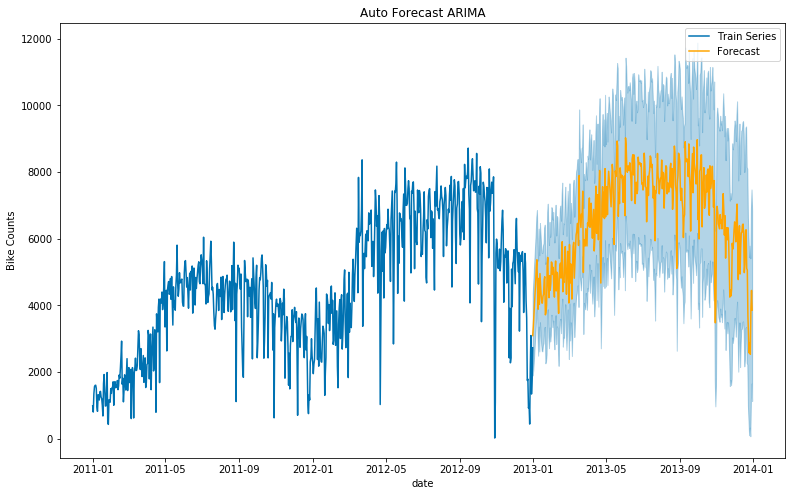

In [17]:
future_index = pd.to_datetime(pd.date_range(pd.to_datetime(bike_sharing["dteday"]).max(), periods=365))
predictions["dates"] = future_index
predictions.set_index(predictions["dates"], inplace=True)
print(predictions.info())
bike_sharing.set_index(pd.to_datetime(bike_sharing["dteday"]), inplace=True)
print(bike_sharing.info())
Plotter.plot_forecast(bike_sharing["cnt"], predictions, ylabel="Bike Counts")